# Employee Attrition study

Employee attrition is a serious problem for a company, maintining its top talents can lead to a great reduction in costs.

Given that the employee's productivity tends to diminish when they decide to leave the company and given that there's an overhead cost in replacing an employee and giving him the propper formation and time to adjust to the new position, it's safe to say that this is a costly event. Granted not all attritions are bad, some employees are just disrupting, but in general maintining the maximum number of employees as possible is a sound strategy, as described [here](https://inventiv.io/what-is-the-cost-of-replacing-an-employee/), [here](https://www.employeeconnect.com/blog/flight-risk-signals-what-makes-employees-leave/) and [here](http://analytics-magazine.org/predictive-analytics-the-privacy-pickle-hewlett-packards-prediction-of-employee-behavior/)

Given this context we'll try to create a model to predict who's about to leave the company so we could report it to HR and they can decid to do something about it

In [41]:
# Loading required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

df = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Great! we got our dataset loaded, let's do a quick check to see how many missing values we're dealing with

In [42]:
df.isna().count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

It seems to be no missing values, which is perfect! we'll go ahead and get familiarized with the dataset

## Exploratory data analysis

This section aims to explorate the data a bit, try to get a feel of the problem and maybe find some key insights that might be useful later on

First of all, lets let's just see the number of people who left and who didn't

In [54]:
# Create just a simple lambda to calculate the proportion of each group 
prop_func = lambda x: round(len(x) / df.shape[0], 5) * 100

df.groupby("Attrition")["Attrition"].agg(["count", prop_func])

,count,<lambda>
Attrition,,
No,1233,83.878
Yes,237,16.122


So we have 237 cases of employees who left the company which is around 16,122% of the entire dataset, this means that our classes are fairly **inbalanced**, so we'll see some ways to work around this issue

Let's continue with our analysis

* Whats the age distribution on each group?

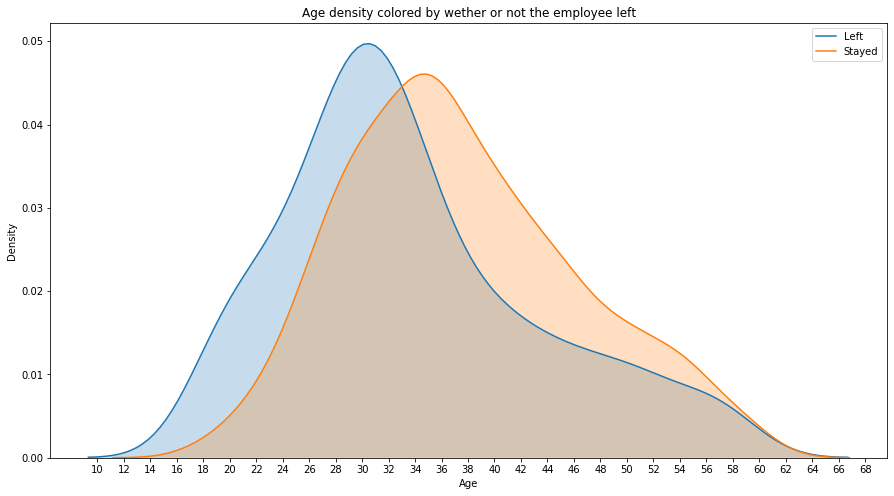

In [82]:
f,ax = plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[df.Attrition == "Yes", "Age"], shade = True, label = "Left")
sns.kdeplot(df.loc[df.Attrition == "No", "Age"], shade = True, label = "Stayed")
ax.set(xlabel = "Age", ylabel = "Density",title = "Age density colored by wether or not the employee left")
ax.set_xticks(range(10, 70, 2))
plt.show()

So it appears younger people tend to leave the company more often which is to be expected since they probably haven't settled on a house/family or they might get more job offerings. This feature is probably a good feature to use in our model

Note: don't worry there are no 10 year-olds working in this company, its just the way the kde plots this graph (:

* Which gender is more likely to leave?

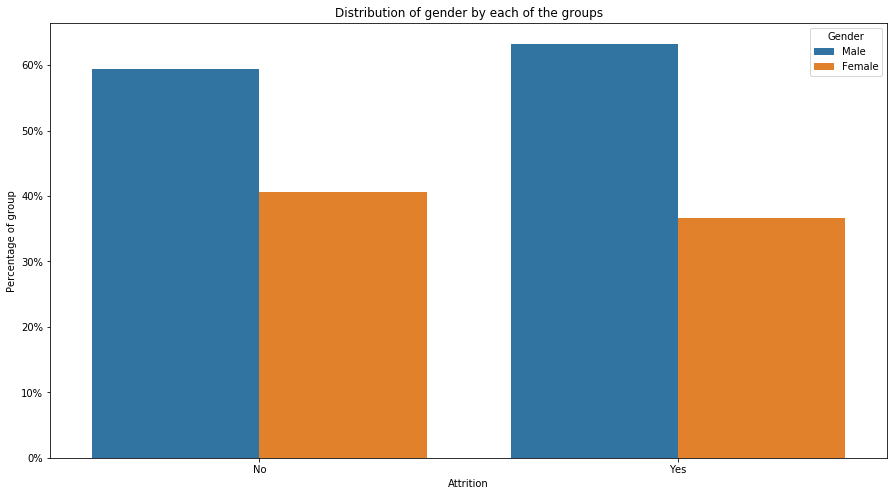

In [123]:
f,ax = plt.subplots(figsize=(15,8))

# Get the proportion of the genders grouped by the attrition status
grouped_data = df["Gender"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()

# Plot the result
sns.barplot(x = "Attrition", y = "Percentage of group", hue = "Gender", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of gender by each of the groups")
plt.show()

This company has more men the women and so this plot shows us that men tend to leave the company more but only because they're in a larger number. This also indicates that gender might not be a key factor for employee attrition